In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
import pandas as pd
from datetime import datetime

days_mapper = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}

import os
import glob

/home/ian/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/ian/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
def load_local_data():
    csv_path = os.path.join(os.getcwd(), 'data/*.txt')
    # sort the files (by date stamp)
    all_files = sorted(glob.glob(csv_path))
    
    print 'reading data from files:'
    for f in all_files:
        print f
    print 'IMPORTANT NOTE: files in the folder must be consecutive! It is up to you to make sure there are not gaps.'
    
    data = pd.concat((pd.read_csv(f) for f in all_files))
    
    # strip whitespace off column headers (eg 'EXITS               ' has trailing spaces)
    data = data.rename(columns=lambda x: x.strip())
    return data

data = load_local_data()
print "\ngot %i rows total." % len(data)

print 'date range:', data.DATE.min(), data.DATE.max()
data.head()

reading data from files:
/home/ian/metis/team_benson/data/turnstile_150502.txt
/home/ian/metis/team_benson/data/turnstile_150509.txt
/home/ian/metis/team_benson/data/turnstile_150516.txt
/home/ian/metis/team_benson/data/turnstile_150523.txt
/home/ian/metis/team_benson/data/turnstile_150530.txt
/home/ian/metis/team_benson/data/turnstile_150606.txt
IMPORTANT NOTE: files in the folder must be consecutive! It is up to you to make sure there are not gaps.

got 1152582 rows total.
date range: 04/25/2015 06/05/2015


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,04/25/2015,00:00:00,REGULAR,5106770,1729635
1,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,04/25/2015,04:00:00,REGULAR,5106810,1729649
2,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,04/25/2015,08:00:00,REGULAR,5106835,1729680
3,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,04/25/2015,12:00:00,REGULAR,5106961,1729784
4,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,04/25/2015,16:00:00,REGULAR,5107250,1729858


In [3]:
# How many stations are there?
unique_stations = data.STATION.unique()
print len(unique_stations)

384


In [4]:
# make a datetime column
data['DATETIME'] = pd.to_datetime((data.DATE + ' ' + data.TIME), format="%m/%d/%Y %H:%M:%S")
data.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,04/25/2015,00:00:00,REGULAR,5106770,1729635,2015-04-25 00:00:00
1,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,04/25/2015,04:00:00,REGULAR,5106810,1729649,2015-04-25 04:00:00
2,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,04/25/2015,08:00:00,REGULAR,5106835,1729680,2015-04-25 08:00:00
3,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,04/25/2015,12:00:00,REGULAR,5106961,1729784,2015-04-25 12:00:00
4,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,04/25/2015,16:00:00,REGULAR,5107250,1729858,2015-04-25 16:00:00


In [5]:
# Sort data by DATETIME
# data.sort_values(by='DATETIME', inplace=True)
# data.head()

In [6]:
# Group by turnstile
turnstile_groupby = data.groupby(['C/A','UNIT','SCP','STATION'])

for diff_field in ('ENTRIES','EXITS'):
    data[diff_field + '_DIFF'] = turnstile_groupby[diff_field].transform(pd.Series.diff)
    
# data['ENTRIES_DIFF'] = turnstile_groupby['ENTRIES'].transform(pd.Series.diff)

data.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,ENTRIES_DIFF,EXITS_DIFF
0,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,04/25/2015,00:00:00,REGULAR,5106770,1729635,2015-04-25 00:00:00,NaN,NaN
1,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,04/25/2015,04:00:00,REGULAR,5106810,1729649,2015-04-25 04:00:00,40,14
2,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,04/25/2015,08:00:00,REGULAR,5106835,1729680,2015-04-25 08:00:00,25,31
3,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,04/25/2015,12:00:00,REGULAR,5106961,1729784,2015-04-25 12:00:00,126,104
4,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,04/25/2015,16:00:00,REGULAR,5107250,1729858,2015-04-25 16:00:00,289,74


In [7]:
data[data.DESC != 'REGULAR'].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,ENTRIES_DIFF,EXITS_DIFF
1113,A010,R080,00-00-00,57 ST-7 AVE,NQR,BMT,04/28/2015,12:00:00,RECOVR AUD,143112,85613,2015-04-28 12:00:00,368,589
1155,A010,R080,00-00-01,57 ST-7 AVE,NQR,BMT,04/28/2015,12:00:00,RECOVR AUD,12250490,4537590,2015-04-28 12:00:00,220,409
1197,A010,R080,00-00-02,57 ST-7 AVE,NQR,BMT,04/28/2015,12:00:00,RECOVR AUD,8936510,3456835,2015-04-28 12:00:00,180,307
1239,A010,R080,00-00-03,57 ST-7 AVE,NQR,BMT,04/28/2015,12:00:00,RECOVR AUD,1865400,918583,2015-04-28 12:00:00,125,240
1281,A010,R080,00-00-04,57 ST-7 AVE,NQR,BMT,04/28/2015,12:00:00,RECOVR AUD,2550498,1228635,2015-04-28 12:00:00,118,249


In [8]:
# sanity check for getting the differences:
nan_entries = len(data[data.ENTRIES_DIFF.isnull()])
total_unique_turnstiles = len(turnstile_groupby)
print 'the number of NaN entries should equal the total unique turnstiles.'
print nan_entries, total_unique_turnstiles

assert nan_entries == total_unique_turnstiles

the number of NaN entries should equal the total unique turnstiles.
4568 4568


## TODO
* Remove stations with negative ENTRIES_DIFF's


In [9]:
print 'negative entries:'
print len(data[(data.ENTRIES_DIFF < 0)])

# if you count NaN's
print len(data[~(data.ENTRIES_DIFF >= 0)])
# if you drop the NaN's first
print len(data.dropna()[~(data.dropna().ENTRIES_DIFF >= 0)])

negative entries:
6496
11064
6496


## Next, get the total station counts
To do this, groupby station and datetime, and sum the diffs across turnstiles

In [10]:
# group by station name and datetime,
station_time_groupby = data.groupby(['STATION','DATETIME','DATE','TIME'], as_index=False)

station_period_totals = station_time_groupby[['ENTRIES_DIFF', 'EXITS_DIFF']].sum()

def remove_suffix(col_name):
    first_underscore = col_name.find('_')
    if first_underscore != -1:
        return col_name[:first_underscore]
    return col_name

# rename the columns, dropping everything after and including the first underscore
station_period_totals.columns = [remove_suffix(column) for column in station_period_totals.columns]

# drop NaN
# station_period_totals.dropna(inplace=True)
station_period_totals.head()

,STATION,DATETIME,DATE,TIME,ENTRIES,EXITS
0,1 AVE,2015-04-25 00:00:00,04/25/2015,00:00:00,NaN,NaN
1,1 AVE,2015-04-25 04:00:00,04/25/2015,04:00:00,3,76
2,1 AVE,2015-04-25 08:00:00,04/25/2015,08:00:00,2,53
3,1 AVE,2015-04-25 12:00:00,04/25/2015,12:00:00,2,54
4,1 AVE,2015-04-25 16:00:00,04/25/2015,16:00:00,4,57


## Try it Zhanna's way and see if you get the same result

In [11]:
# Zhanna: you could also group by station and datetime, sum the entries & exits, then do the diff.
# Use level=0 for MultiIndex on station.
# Since you aren't using turnstile-level data in the analysis, sum them and find the diffs to get the same result!

zhanna_station_groupby = data.drop(['ENTRIES_DIFF','EXITS_DIFF'], axis=1).groupby(['STATION','DATETIME'])
# summed cumulative entries and exits, per station
zhanna_station_groupby.sum().head()

ENTRIES      EXITS
STATION DATETIME                                 
1 AVE   2015-04-25 00:00:00  464288477  478501789
        2015-04-25 04:00:00  464288480  478501865
        2015-04-25 08:00:00  464288482  478501918
        2015-04-25 12:00:00  464288484  478501972
        2015-04-25 16:00:00  464288488  478502029

In [12]:
# diff of summed cumulative entries
zhanna_station_counts_timeblock = zhanna_station_groupby.sum().diff()
zhanna_station_counts_timeblock.reset_index(inplace=True)
# zhanna_station_counts_timeblock.dropna(inplace=True)
zhanna_station_counts_timeblock.head()

,STATION,DATETIME,ENTRIES,EXITS
0,1 AVE,2015-04-25 00:00:00,NaN,NaN
1,1 AVE,2015-04-25 04:00:00,3,76
2,1 AVE,2015-04-25 08:00:00,2,53
3,1 AVE,2015-04-25 12:00:00,2,54
4,1 AVE,2015-04-25 16:00:00,4,57


In [13]:
# these 675 are a difference in NaN rows which were dropped -- ie when I uncommented the .dropna lines above, 
# the difference in len was 675

len(zhanna_station_counts_timeblock['ENTRIES']) - len(station_period_totals['ENTRIES'])

0

In [14]:
zhanna_diff_df = pd.concat([
    zhanna_station_counts_timeblock.drop('EXITS', axis=1).rename(columns={'ENTRIES':'ENTRIES_ZH'}), 
    station_period_totals.ENTRIES], axis=1)
print len(zhanna_diff_df), len(station_period_totals)
assert len(zhanna_diff_df) == len(station_period_totals)
zhanna_diff_df.head()

169371 169371


,STATION,DATETIME,ENTRIES_ZH,ENTRIES
0,1 AVE,2015-04-25 00:00:00,NaN,NaN
1,1 AVE,2015-04-25 04:00:00,3,3
2,1 AVE,2015-04-25 08:00:00,2,2
3,1 AVE,2015-04-25 12:00:00,2,2
4,1 AVE,2015-04-25 16:00:00,4,4


In [15]:
zhanna_diff_df[zhanna_diff_df.ENTRIES != zhanna_diff_df.ENTRIES_ZH].head()

,STATION,DATETIME,ENTRIES_ZH,ENTRIES
0,1 AVE,2015-04-25 00:00:00,NaN,NaN
38,1 AVE,2015-05-01 07:40:54,-438449378,349
39,1 AVE,2015-05-01 08:00:00,438451251,1524
57,1 AVE,2015-05-04 07:41:40,-25941191,1059
58,1 AVE,2015-05-04 08:00:00,25943055,805


In [16]:
zhanna_diff_df.describe()

,ENTRIES_ZH,ENTRIES
count,1.693700e+05,1.686880e+05
mean,-2.428043e+03,4.903472e+04
std,6.290768e+08,8.730329e+06
min,-7.453718e+09,-1.403804e+09
25%,-1.326000e+03,4.400000e+01
50%,8.240000e+02,3.080000e+02
75%,1.165025e+04,1.269000e+03
max,7.453700e+09,1.941365e+09


In [17]:
print 'Negative ENTRIES with zhanna groupby.diff vs my transform(pd.Series.diff)'
print len(zhanna_diff_df[zhanna_diff_df.ENTRIES_ZH < 0])
print len(zhanna_diff_df[zhanna_diff_df.ENTRIES < 0])

Negative ENTRIES with zhanna groupby.diff vs my transform(pd.Series.diff)
43088
77


## --> RESULTS of `diff` methods comparison
The "zhanna way" has less NaN's, and it looks like those NaN's are replaced with many, many big negative numbers. 
Maybe this is due to a buggy behavior in `groupby.diff` ???

Or maybe it's because of non-REGULAR entries?

I still don't understand it, but I think mine is safer...



## Clean up: Remove NaN's and negative ENTRIES from station_period_totals

In [18]:
pre_cleanup_len = len(station_period_totals)

station_period_totals = station_period_totals[station_period_totals.ENTRIES >= 0]

print 'got rid of %i rows' % (pre_cleanup_len - len(station_period_totals))

got rid of 760 rows


## Clean up: Round down (floor) the datetimes to the nearest 4th hour

Also, drop TIME so you don't use it accidentally

In [19]:
# station_period_totals['DATETIME'] = station_period_totals['DATETIME'].apply(
#     lambda dt: datetime(dt.year, dt.month, dt.day,4*(dt.hour//4)))

# station_period_totals.drop('TIME', axis=1, inplace=True)

# print station_period_totals.DATETIME.unique()[:20]
# station_period_totals.head()

## Daily totals per station

In [20]:
daily_station_totals = station_period_totals.drop('DATETIME', axis=1).groupby(['STATION','DATE'], as_index=False).sum()
daily_station_totals.head()

,STATION,DATE,ENTRIES,EXITS
0,1 AVE,04/25/2015,11,281
1,1 AVE,04/26/2015,11,294
2,1 AVE,04/27/2015,19127,20131
3,1 AVE,04/28/2015,22576,23697
4,1 AVE,04/29/2015,23716,23699


In [21]:
# find top stations for ENTRIES on date of interest
date_of_interest = '05/17/2015' # a Sunday
top_daily_entries = daily_station_totals[daily_station_totals['DATE'] == date_of_interest].sort_values(by='ENTRIES', ascending=False).head(10)
top_daily_entries

,STATION,DATE,ENTRIES,EXITS
2828,34 ST-PENN STA,05/17/2015,83294,73451
778,14 ST-UNION SQ,05/17/2015,65589,60749
4755,86 ST,05/17/2015,63876,57177
3122,42 ST-TIMES SQ,05/17/2015,63049,57912
2786,34 ST-HERALD SQ,05/17/2015,58728,56489
3080,42 ST-PA BUS TE,05/17/2015,58407,49753
3038,42 ST-GRD CNTRL,05/17/2015,50249,50372
3836,59 ST-COLUMBUS,05/17/2015,48829,39594
7356,CANAL ST,05/17/2015,45710,36979
484,125 ST,05/17/2015,44583,45445


In [22]:
doi = pd.to_datetime(date_of_interest)
doi.dayofweek

6

check it out, sunday traffic is different


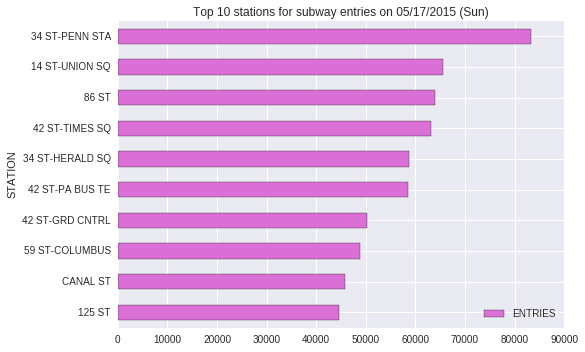

In [23]:
print 'check it out, sunday traffic is different'

# for some reason you have to make ascending=True to make barh in descending order...
top_daily_entries.sort_values(by='ENTRIES', ascending=True).plot.barh(x='STATION', 
    y='ENTRIES', 
    title='Top 10 stations for subway entries on %s (%s)' % (date_of_interest, days_mapper[pd.to_datetime(date_of_interest).dayofweek]),
    color='orchid',
    legend=True)

# TODO
* Do that same graph, but for the month that Lucia did

In [24]:
print 'this is old, bad, no good'

# fig, ax = plt.subplots(figsize=[15,5])

# station_period_totals[station_period_totals['STATION'] == station_of_interest][['DATETIME','ENTRIES']].plot(
#     title='Time-period total entries (usually 4-hour blocks) at %s' % station_of_interest,
#     x='DATETIME',
#     y='ENTRIES',
#     legend=False,
#     color='orchid',
#     rot=90,
#     ax=ax)

# ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

# plt.show()

this is old, bad, no good


# Set station of interest for the rest of the notebook

In [89]:
station_of_interest = '86 ST'
assert station_of_interest in station_period_totals.STATION.unique()

# TODO
* Make sure the selected time period is all **REGULAR**

## Heatmap, average entries over 2 month period for single station of interest.
Time of day x day of week

In [90]:
print 'for %s' % station_of_interest
station_entries_data = station_period_totals[station_period_totals.STATION == station_of_interest][
    ['DATE','DATETIME','ENTRIES']]

station_entries_data.head()

for 86 ST


,DATE,DATETIME,ENTRIES
34927,04/25/2015,2015-04-25 04:00:00,1834
34928,04/25/2015,2015-04-25 05:00:00,300
34929,04/25/2015,2015-04-25 08:00:00,2659
34930,04/25/2015,2015-04-25 09:00:00,1247
34931,04/25/2015,2015-04-25 12:00:00,11480


In [91]:
# # station_entries_data['TIME'] = station_entries_data.DATETIME.dt.time
# station_pivot = station_entries_data_time.pivot('TIME','DATE','ENTRIES')
# station_pivot

# # drop NaN's (within threshold). Ideally you would add to the nearest bracket
# # station_pivot.dropna(axis=0, inplace=True, thresh=2)
# station_pivot

In [92]:
# print station_of_interest

# fig, ax = plt.subplots(figsize=[15,8])
# sns.heatmap(station_pivot, ax=ax)

## Let's try to separate everything into days of the week

In [93]:
station_day_of_week = station_period_totals[station_period_totals['STATION'] == station_of_interest].copy()

station_day_of_week['WEEKDAY'] = station_day_of_week.DATETIME.dt.dayofweek

station_day_of_week.sort_values(by='DATETIME', inplace=True)
# station_day_of_week.WEEKDAY = station_day_of_week.WEEKDAY.apply(lambda d: days_mapper[d])

station_day_of_week.head()

,STATION,DATETIME,DATE,TIME,ENTRIES,EXITS,WEEKDAY
34927,86 ST,2015-04-25 04:00:00,04/25/2015,04:00:00,1834,2641,5
34928,86 ST,2015-04-25 05:00:00,04/25/2015,05:00:00,300,360,5
34929,86 ST,2015-04-25 08:00:00,04/25/2015,08:00:00,2659,3685,5
34930,86 ST,2015-04-25 09:00:00,04/25/2015,09:00:00,1247,1206,5
34931,86 ST,2015-04-25 12:00:00,04/25/2015,12:00:00,11480,13829,5


In [94]:
station_weekday_avgs = station_day_of_week.groupby(['WEEKDAY',station_day_of_week.DATETIME.dt.time], sort=True).mean()
station_weekday_avgs.head(10)

ENTRIES         EXITS
WEEKDAY DATETIME                            
0       00:00:00   6214.500000   5432.166667
        01:00:00   1426.000000   1247.166667
        04:00:00    819.833333    756.166667
        05:00:00    192.833333    150.500000
        08:00:00   8846.333333   6095.000000
        09:00:00   4664.166667   3099.833333
        09:51:14  13178.000000    393.000000
        12:00:00  20837.666667  14172.166667
        13:00:00   4372.833333   3482.166667
        16:00:00  17189.166667  13174.500000

In [95]:
# weekday_pivot = station_weekday_avgs.reset_index().pivot('TIME','WEEKDAY','ENTRIES')
# # integers to English language days
# weekday_pivot.columns = [days_mapper[c] for c in weekday_pivot.columns]
# weekday_pivot

In [96]:
# print 'Day of week heatmap for %s: average entries over entire time period' % station_of_interest
# fig, ax = plt.subplots(figsize=[15,8])
# sns.heatmap(weekday_pivot.dropna(axis=0), ax=ax);

             ENTRIES        EXITS
WEEKDAY                          
0        8328.452055  6549.917808
1        9440.773333  7191.293333
2        9292.269231  7128.333333
3        9102.115385  7113.871795
4        9814.946667  7495.360000
5        6337.214286  5347.614286
6        5186.194444  4538.888889


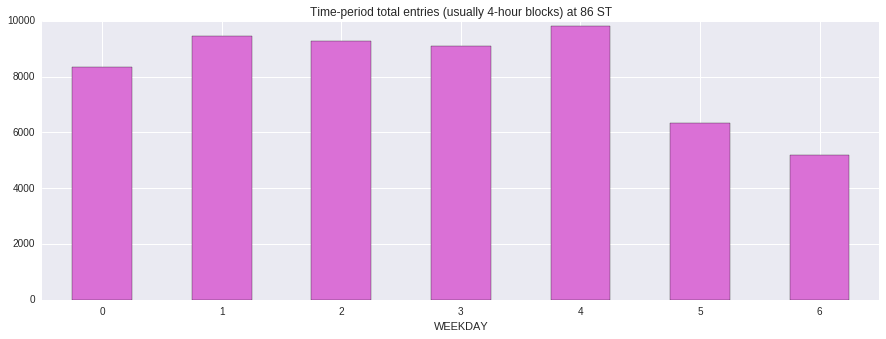

In [97]:
fig, ax = plt.subplots(figsize=[15,5])

station_weekday_only_avgs = station_day_of_week.groupby(['WEEKDAY'], sort='False').mean()

print station_weekday_only_avgs

station_weekday_only_avgs.plot(
    kind='bar',
    title='Time-period total entries (usually 4-hour blocks) at %s' % station_of_interest,
#     x=['WEEKDAY','TIME'],
    y='ENTRIES',
    legend=False,
    color='orchid',
    rot=0,
    ax=ax)

# ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

plt.show()

# Rounding Times (an aside)

With a pandas DatetimeIndex, you can do ts.resample(...) to round it

??? http://stackoverflow.com/questions/15799162/resampling-within-a-pandas-multiindex

I broke this out to this notebook: [Resampling with MultiIndex](./Resampling with MultiIndex.ipynb)

In [98]:
def round_nearest_four_hr(ts):
    """Round the timestamp ts to the nearest 04:00.
    ts must be a DatetimeIndex !!!"""
    return ts.resample('4H')
    
test_ts = pd.Series([11,22], index=[pd.to_datetime('12/25/2016 01:12:34'), pd.to_datetime('12/25/2016 01:12:35')])

print test_ts

test_ts.resample('4H')

2016-12-25 01:12:34    11
2016-12-25 01:12:35    22
dtype: int64


2016-12-25    16.5
Freq: 4H, dtype: float64

In [99]:
# convert to numpy datetime64 (an option.. probably not a good one)
np.datetime64(pd.to_datetime('12/25/2016 01:12:35'))

numpy.datetime64('2016-12-24T20:12:35.000000-0500')

## Let's try to round the times

In [100]:
station_period_totals.head()

,STATION,DATETIME,DATE,TIME,ENTRIES,EXITS
1,1 AVE,2015-04-25 04:00:00,04/25/2015,04:00:00,3,76
2,1 AVE,2015-04-25 08:00:00,04/25/2015,08:00:00,2,53
3,1 AVE,2015-04-25 12:00:00,04/25/2015,12:00:00,2,54
4,1 AVE,2015-04-25 16:00:00,04/25/2015,16:00:00,4,57
5,1 AVE,2015-04-25 20:00:00,04/25/2015,20:00:00,0,41


In [101]:
rounded_times = station_period_totals.set_index('DATETIME').groupby('STATION')

rounded_times = rounded_times.resample('4H', convention='end', how='sum')

print len(station_period_totals), len(rounded_times)

print station_of_interest
print 'len before rounding:'
print len(station_period_totals[station_period_totals.STATION == station_of_interest])
print 'len after rounding:'
print len(rounded_times.loc[station_of_interest])

rounded_times.head()

168611 96223
86 ST
len before rounding:
521
len after rounding:
251


ENTRIES  EXITS
STATION DATETIME                           
1 AVE   2015-04-25 04:00:00        3     76
        2015-04-25 08:00:00        2     53
        2015-04-25 12:00:00        2     54
        2015-04-25 16:00:00        4     57
        2015-04-25 20:00:00        0     41

In [102]:
np.unique(rounded_times.loc[station_of_interest].index.time)

array([datetime.time(0, 0), datetime.time(4, 0), datetime.time(8, 0),
       datetime.time(12, 0), datetime.time(16, 0), datetime.time(20, 0)], dtype=object)

# Try again to separate by day of week

In [103]:
day_of_week_SOI = rounded_times.loc[station_of_interest].reset_index() #.reset_index('DATETIME')
day_of_week_SOI['WEEKDAY'] = day_of_week_SOI.DATETIME.dt.dayofweek
day_of_week_SOI['TIME'] = day_of_week_SOI.DATETIME.dt.time

mean_day_of_week_SOI = day_of_week_SOI.drop('DATETIME', axis=1).groupby(['WEEKDAY','TIME']).mean()
mean_day_of_week_SOI

ENTRIES         EXITS
WEEKDAY TIME                                
0       00:00:00   7640.500000   6679.333333
        04:00:00   1012.666667    906.666667
        08:00:00  15706.833333   9260.333333
        12:00:00  25210.500000  17654.333333
        16:00:00  22421.166667  17512.166667
        20:00:00  29337.833333  27677.833333
1       00:00:00  10402.666667   8961.000000
        04:00:00   1058.166667    836.833333
        08:00:00  16922.166667  10748.666667
        12:00:00  31133.166667  19586.166667
        16:00:00  24800.000000  19077.833333
        20:00:00  33693.500000  30680.666667
2       00:00:00  11283.666667  10748.000000
        04:00:00   1075.500000   1025.833333
        08:00:00  19727.833333  10562.666667
        12:00:00  29688.166667  19958.833333
        16:00:00  24821.000000  19382.000000
        20:00:00  34203.333333  30991.000000
3       00:00:00  11904.500000  11293.500000
        04:00:00   2293.166667   1315.666667
        08:00:00  15905.000000  10453.333333
        12:00:00  32042.166667  20216.166667
        16:00:00  24748.000000  19573.833333
        20:00:00  31434.666667  29627.833333
4       00:00:00  14917.333333  11912.500000
        04:00:00   1316.333333   1205.333333
        08:00:00  16851.333333  10611.500000
        12:00:00  28256.166667  20403.166667
        16:00:00  26967.000000  21273.500000
        20:00:00  34378.666667  28286.000000
5       00:00:00  13709.000000  10760.400000
        04:00:00   2035.666667   2160.166667
        08:00:00   3588.333333   3852.500000
        12:00:00  13807.166667  13562.333333
        16:00:00  21076.500000  17086.666667
        20:00:00  22002.333333  16760.166667
6       00:00:00  10831.833333   8882.000000
        04:00:00   2917.833333   2336.666667
        08:00:00   2341.166667   2655.833333
        12:00:00  11078.166667  10970.666667
        16:00:00  17931.000000  15945.333333
        20:00:00  17134.333333  13676.166667

In [104]:
plot_mean_day_of_week_SOI = mean_day_of_week_SOI.reset_index()

plot_mean_day_of_week_SOI['LABEL'] = \
    plot_mean_day_of_week_SOI['WEEKDAY'].apply(lambda x: str(x)) \
    + plot_mean_day_of_week_SOI['TIME'].apply(lambda x: str(x))

plot_mean_day_of_week_SOI.head()

,WEEKDAY,TIME,ENTRIES,EXITS,LABEL
0,0,00:00:00,7640.500000,6679.333333,000:00:00
1,0,04:00:00,1012.666667,906.666667,004:00:00
2,0,08:00:00,15706.833333,9260.333333,008:00:00
3,0,12:00:00,25210.500000,17654.333333,012:00:00
4,0,16:00:00,22421.166667,17512.166667,016:00:00


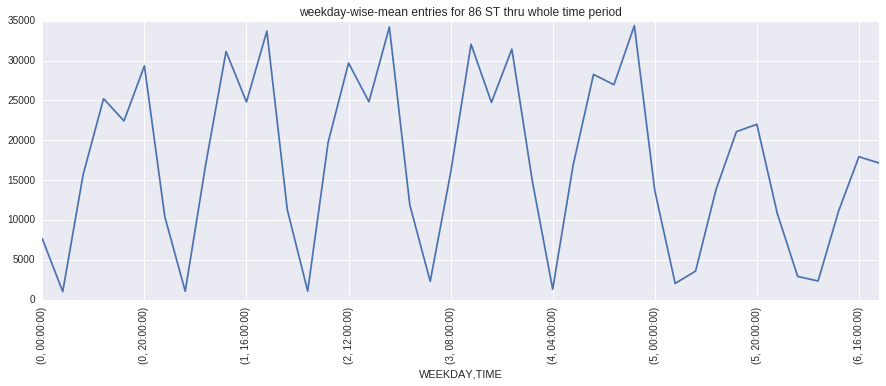

In [105]:
fig, ax = plt.subplots(figsize=[15,5])

mean_day_of_week_SOI.plot(
#     x='LABEL',
    y='ENTRIES', 
    title='weekday-wise-mean entries for %s thru whole time period' % station_of_interest, 
    rot=90,
    ax=ax,
    legend=False)

# plt.xticks(range(7*(24/4)+1))

plt.show()
# ax.xaxis.set_major_locator(ticker.MultipleLocator(0.250))
# ax.set_xticklabels(mean_day_of_week_SOI.index);